Тема 6: Метод k-середніх, Ієрархічна кластеризація в системах машинного навчання
Виконати реалізацію алгоритмів k-середніх та ієрархічної кластеризації на одному з датасетів
на вибір https://www.kaggle.com/datasets?search=security. Дослідити залежність точності методу від
параметрів даних.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
from sklearn.utils import resample

In [3]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
p = df[['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']]
X = p.head(60000)


In [13]:
print("\nK-Means Clustering:")
k_values = range(2, 10, 2)
silhouette_scores = []

for k in k_values:
    print('i')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.4f}")


K-Means Clustering:
i
k=2, Silhouette Score: 0.6274
i
k=4, Silhouette Score: 0.5714
i
k=6, Silhouette Score: 0.5545
i
k=8, Silhouette Score: 0.5451


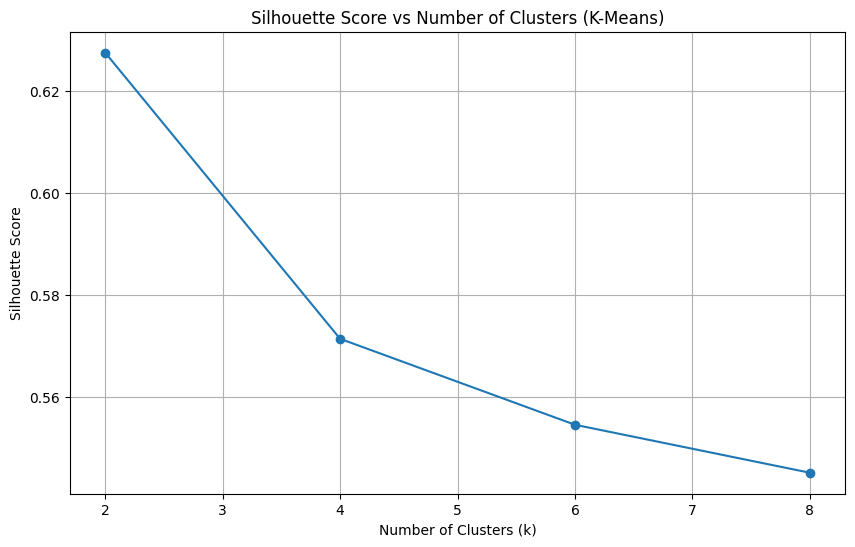

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [ ]:
X = resample(p, n_samples=10000, random_state=42)
k_values = range(2, 10, 2)
silhouette_scores_agglo = []
for k in k_values:
    agglo = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels_agglo = agglo.fit_predict(X)
    score = silhouette_score(X, labels_agglo)
    silhouette_scores_agglo.append(score)
    print(f"Agglomerative Clustering with {k} clusters, Silhouette Score: {score:.4f}")

Agglomerative Clustering with 2 clusters, Silhouette Score: 0.6023
Agglomerative Clustering with 4 clusters, Silhouette Score: 0.5629
Agglomerative Clustering with 6 clusters, Silhouette Score: 0.5351
Agglomerative Clustering with 8 clusters, Silhouette Score: 0.5261


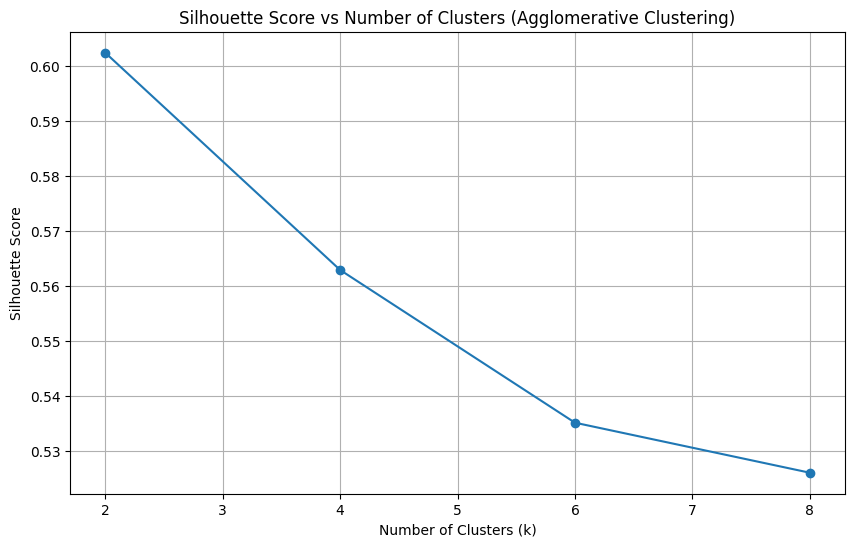

In [6]:
# Plot Silhouette Scores for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_agglo, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()
